# Metadata explore

In this notebook, we use the `allDatasets` dataset from ERDDAP to examine the primary metadata of all glider missions

In [20]:
from utils import init_erddap
import datetime
plt.rcParams.update({'font.size': 16})

In [2]:
e = init_erddap()

# Fetch dataset list
e.response = "csv"
e.dataset_id = "allDatasets"
df_datasets = e.to_pandas(parse_dates=['minTime (UTC)', 'maxTime (UTC)'])

print(f"found {len(df_datasets)} datasets")

found 110 datasets


In [3]:
# drop the allDatasets row and make the datasetID the index for easier reading
df_datasets.set_index("datasetID", inplace=True)
df_datasets.drop("allDatasets", inplace=True)

In [4]:
df_datasets.head()

,accessible,institution,dataStructure,cdm_data_type,class,title,minLongitude (degrees_east),maxLongitude (degrees_east),longitudeSpacing (degrees_east),minLatitude (degrees_north),...,fgdc,iso19115,metadata,sourceUrl,infoUrl,rss,email,testOutOfDate,outOfDate,summary
datasetID,,,,,,,,,,,,,,,,,,,,,
nrt_SEA068_M27,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Aster68-20220727T1709,19.901883,19.982300,NaN,58.199850,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,now-35days,1.039495,Summer 2022 Eastern Gotland Basin trials
nrt_SEA069_M9,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Kalmus69-20220727T1637,19.909683,19.964233,NaN,58.192767,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,now-35days,1.038518,Summer 2022 Eastern Gotland Basin trials
delayed_SEA055_M16,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Kaprifol55-20201031T0902,15.692183,16.237867,NaN,55.471550,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,NaN,NaN,Part of SAMBA continuous monitoring
delayed_SEA055_M18,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Kaprifol55-20210305T0813,15.972000,16.378150,NaN,55.246500,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,NaN,NaN,Part of SAMBA continuous monitoring
delayed_SEA055_M19,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Kaprifol55-20210326T0938,15.983767,16.355867,NaN,55.239433,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,NaN,NaN,Part of SAMBA continuous monitoring


What metadata do we have acess to?

In [5]:
list(df_datasets)

['accessible',
 'institution',
 'dataStructure',
 'cdm_data_type',
 'class',
 'title',
 'minLongitude (degrees_east)',
 'maxLongitude (degrees_east)',
 'longitudeSpacing (degrees_east)',
 'minLatitude (degrees_north)',
 'maxLatitude (degrees_north)',
 'latitudeSpacing (degrees_north)',
 'minAltitude (m)',
 'maxAltitude (m)',
 'minTime (UTC)',
 'maxTime (UTC)',
 'timeSpacing (seconds)',
 'griddap',
 'subset',
 'tabledap',
 'MakeAGraph',
 'sos',
 'wcs',
 'wms',
 'files',
 'fgdc',
 'iso19115',
 'metadata',
 'sourceUrl',
 'infoUrl',
 'rss',
 'email',
 'testOutOfDate',
 'outOfDate',
 'summary']

### We can use this metadata to start queries. Which missions lasted the longest?

In [6]:
# Find datasets from deployments that lasted longer than a set number of days
df_datasets["endurance"] = df_datasets['maxTime (UTC)'] - df_datasets['minTime (UTC)']
min_days = 30
df_datasets[df_datasets["endurance"] > datetime.timedelta(days=min_days)].endurance

datasetID
delayed_SEA045_M41   34 days 03:09:14
delayed_SEA045_M43   32 days 23:24:15
delayed_SEA045_M44   32 days 01:33:04
delayed_SEA044_M32   34 days 03:45:59
delayed_SEA044_M34   32 days 22:45:43
delayed_SEA044_M35   32 days 01:31:50
Name: endurance, dtype: timedelta64[ns]

### Which glider missions extended to a depth of greater than 150 m in the seas northeast of Gotland?

In [7]:
min_altitude = -150# note the sign!
min_easting = 19
min_northing = 58
mask = (df_datasets['maxAltitude (m)'] < min_altitude).values \
* (df_datasets['maxLongitude (degrees_east)'] > min_easting).values \
* (df_datasets['maxLatitude (degrees_north)'] > min_northing).values
df_datasets[mask]

,accessible,institution,dataStructure,cdm_data_type,class,title,minLongitude (degrees_east),maxLongitude (degrees_east),longitudeSpacing (degrees_east),minLatitude (degrees_north),...,iso19115,metadata,sourceUrl,infoUrl,rss,email,testOutOfDate,outOfDate,summary,endurance
datasetID,,,,,,,,,,,,,,,,,,,,,
nrt_SEA068_M27,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Aster68-20220727T1709,19.901883,19.982300,NaN,58.199850,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,now-35days,1.039495,Summer 2022 Eastern Gotland Basin trials,3 days 09:37:28
nrt_SEA069_M9,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Kalmus69-20220727T1637,19.909683,19.964233,NaN,58.192767,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,now-35days,1.038518,Summer 2022 Eastern Gotland Basin trials,3 days 10:58:26
delayed_SEA067_M26,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Marviol67-20220411T1736,19.476650,20.081433,NaN,58.253600,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,NaN,NaN,Part of CABLE project. Voice of the Ocean Foun...,22 days 15:00:27
nrt_SEA067_M26,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Marviol67-20220411T1736,19.476850,20.081050,NaN,58.256333,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,NaN,NaN,Part of CABLE project. Voice of the Ocean Foun...,22 days 14:14:38
nrt_SEA067_M27,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Marviol67-20220506T0748,19.493217,20.089733,NaN,58.085267,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,NaN,NaN,Part of CABLE project. Voice of the Ocean Foun...,24 days 01:54:48
nrt_SEA067_M29,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Marviol67-20220601T1308,19.486650,20.086900,NaN,57.937183,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,now-115days,0.665175,Part of CABLE project. Voice of the Ocean Foun...,19 days 10:56:20
nrt_SEA067_M30,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Marviol67-20220621T2228,19.777567,19.954867,NaN,58.153900,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,now-109days,0.672732,Part of CABLE project. Voice of the Ocean Foun...,2 days 05:37:22
nrt_SEA066_M41,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Saltarv66-20220727T1334,19.510517,20.089733,NaN,58.052983,...,https://erddap.observat

In [8]:
# Find missions where the dataset ID number doesn't match the name. This indicates the wrong dataset has been loaded

for dataset_id, row in df_datasets.iterrows():
    name = row["title"]
    if "SEA" not in dataset_id:
        continue
    num_title = int(name.split("-")[0][-2:])
    num_id = int(dataset_id.split("_")[1][-3:])
    if num_id != num_title:
        print(name, dataset_id)

---------------------

# Deeper metadata

To access metadata at the sensor level, we need to download the .das metadata for each dataset. This is currently a rather hacky text parsing job.

In [9]:
import re
import requests
import matplotlib.pyplot as plt

In [10]:
from requests.exceptions import HTTPError

In [11]:
def clean_dict(dict_str):
    clean_str = re.sub(r"'", ' ', dict_str).strip(" ")[2:-4]
    pairs = clean_str.split(",")
    clean_dict = {}
    for pair in pairs:
        key, *val = pair.split(":")
        key = key.strip(" ")
        try:
            val = val[0].strip(" ")
        except:
            val = val
        clean_dict[key] = val
    return clean_dict

def get_meta(dataset_id):
    dds_url = f"https://erddap.observations.voiceoftheocean.org/erddap/tabledap/{dataset_id}.das"
    response = requests.get(dds_url).text
    nc_vars, nc_globals = response.split("NC_GLOBAL")
    global_attrs_list = nc_globals.split("String")[1:]
    global_attrs = {}
    for item in global_attrs_list:
        _, name, *val = item.split(" ")
        val = " ".join(val)
        global_attrs[name] = val
    global_attrs_clean = {}
    for global_name, global_val in global_attrs.items():
        if "{" in global_val:
            global_attrs_clean[global_name] = clean_dict(global_val)
        else:
            global_attrs_clean[global_name] = global_val.strip(" ")[:-2].strip('"')
    return global_attrs_clean


**NB!** Requesting the .das metadata for the delayed datasets can take over a minute per dataset. To speed things up, leave the top line of the following cell uncommonted, this will download deep metadata from only the nrt datasets.

In [12]:
df_datasets = df_datasets[df_datasets.index.str[:3] == "nrt"]
ds_meta = {}
for dataset_id in df_datasets.index:
    print(dataset_id)
    ds_meta[dataset_id] = get_meta(dataset_id)

nrt_SEA068_M27
nrt_SEA069_M9
nrt_SEA055_M24
nrt_SEA055_M31
nrt_SEA055_M33
nrt_SEA055_M35
nrt_SEA055_M37
nrt_SEA055_M39
nrt_SEA055_M41
nrt_SEA055_M43
nrt_SEA045_M54
nrt_SEA045_M56
nrt_SEA045_M60
nrt_SEA045_M62
nrt_SEA045_M64
nrt_SEA045_M65
nrt_SEA063_M33
nrt_SEA063_M35
nrt_SEA063_M37
nrt_SEA063_M38
nrt_SEA063_M39
nrt_SEA063_M40
nrt_SEA044_M48
nrt_SEA067_M26
nrt_SEA067_M27
nrt_SEA067_M29
nrt_SEA067_M30
nrt_SEA066_M14
nrt_SEA066_M16
nrt_SEA066_M41
nrt_SEA066_M42
nrt_SEA056_M40
nrt_SEA061_M50
nrt_SEA061_M54
nrt_SEA061_M56
nrt_SEA061_M57
nrt_SEA061_M60
nrt_SEA061_M62
nrt_SEA061_M63


# A more complex request


We're hunting for deoxygenation. Let's extract oxygen concentration from all deployments in the Baltic proper (east of 13 E) at depths greater than 70 m. First, let's just do CODA optode serial number 205592

In [13]:
e.variables = [
    "latitude",
    "longitude",
    "salinity",
    "temperature",
    "time",
    "pressure",
    "oxygen_concentration",
]

e.constraints = {
    "depth>=": 80,
    "longitude>=": 13,
}

coda_datasets = {}

for dataset_id, meta in ds_meta.items():
    oxy = meta["oxygen"]
    if  oxy["serial"] == "205592":
        e.dataset_id = dataset_id
        try:
            ds = e.to_xarray()
            coda_datasets[dataset_id] = ds
        except HTTPError:
            print(f"no matching data in {dataset_id} for these constraints")

no matching data in nrt_SEA066_M16 for these constraints


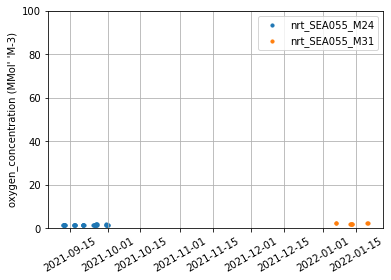

In [18]:
fig, ax = plt.subplots()
for name, ds in coda_datasets.items():
    ax.scatter(ds.time, ds.oxygen_concentration, label=name, s=10)
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=30);
ax.set(ylabel=f"{ds.oxygen_concentration.name} ({ds.oxygen_concentration.units})", ylim=(0, 100))
plt.grid()

In [15]:
# Find and print all unique oxygen optode serial numbers
serials = []
for dataset_id, meta in ds_meta.items():
    serials.append(meta["oxygen"]["serial"])
serials_uniq = list(set(serials))
serials_uniq.sort(reverse=True)
print(serials_uniq)

['206795', '206116', '206115', '205592', '0058', '0044', '0041', '0040', '0039', '0038']


In [23]:
ds_meta.keys()

dict_keys(['nrt_SEA068_M27', 'nrt_SEA069_M9', 'nrt_SEA055_M24', 'nrt_SEA055_M31', 'nrt_SEA055_M33', 'nrt_SEA055_M35', 'nrt_SEA055_M37', 'nrt_SEA055_M39', 'nrt_SEA055_M41', 'nrt_SEA055_M43', 'nrt_SEA045_M54', 'nrt_SEA045_M56', 'nrt_SEA045_M60', 'nrt_SEA045_M62', 'nrt_SEA045_M64', 'nrt_SEA045_M65', 'nrt_SEA063_M33', 'nrt_SEA063_M35', 'nrt_SEA063_M37', 'nrt_SEA063_M38', 'nrt_SEA063_M39', 'nrt_SEA063_M40', 'nrt_SEA044_M48', 'nrt_SEA067_M26', 'nrt_SEA067_M27', 'nrt_SEA067_M29', 'nrt_SEA067_M30', 'nrt_SEA066_M14', 'nrt_SEA066_M16', 'nrt_SEA066_M41', 'nrt_SEA066_M42', 'nrt_SEA056_M40', 'nrt_SEA061_M50', 'nrt_SEA061_M54', 'nrt_SEA061_M56', 'nrt_SEA061_M57', 'nrt_SEA061_M60', 'nrt_SEA061_M62', 'nrt_SEA061_M63'])

nrt_SEA068_M27
nrt_SEA069_M9
nrt_SEA067_M26
nrt_SEA067_M27
nrt_SEA067_M29
nrt_SEA067_M30
nrt_SEA066_M14
nrt_SEA066_M16
no matching data in nrt_SEA066_M16 for these constraints
nrt_SEA066_M41
nrt_SEA066_M42
nrt_SEA055_M41
no matching data in nrt_SEA055_M41 for these constraints
nrt_SEA055_M43
nrt_SEA063_M33
nrt_SEA063_M35
nrt_SEA063_M37
nrt_SEA063_M38
nrt_SEA063_M39
nrt_SEA063_M40
no matching data in nrt_SEA063_M40 for these constraints
nrt_SEA044_M48
nrt_SEA055_M24
nrt_SEA055_M31
nrt_SEA055_M33
no matching data in nrt_SEA055_M33 for these constraints
nrt_SEA055_M35
no matching data in nrt_SEA055_M35 for these constraints
nrt_SEA055_M37
nrt_SEA055_M39
no matching data in nrt_SEA055_M39 for these constraints
nrt_SEA045_M54
no matching data in nrt_SEA045_M54 for these constraints
nrt_SEA045_M56
no matching data in nrt_SEA045_M56 for these constraints
nrt_SEA045_M60
nrt_SEA045_M62
nrt_SEA045_M64
nrt_SEA045_M65
nrt_SEA056_M40
nrt_SEA061_M50
nrt_SEA061_M54
nrt_SEA061_M56
no matching data in 

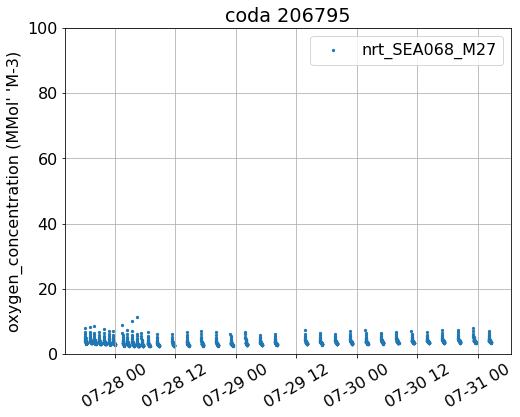

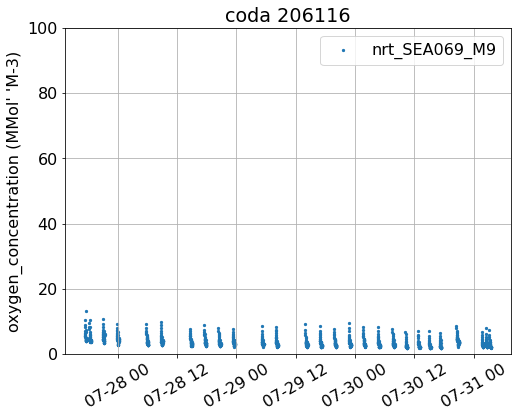

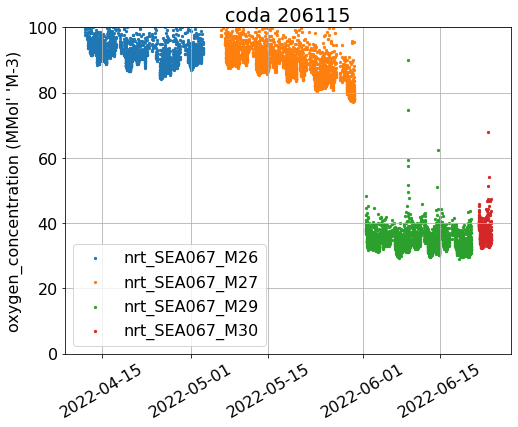

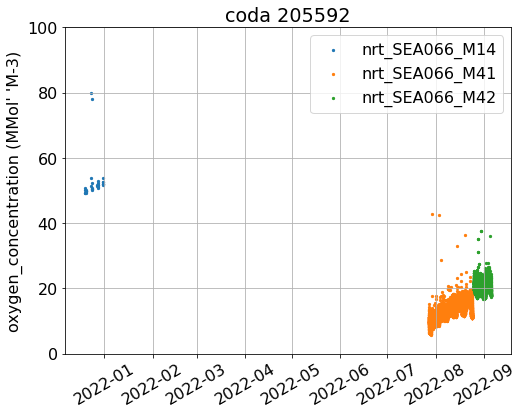

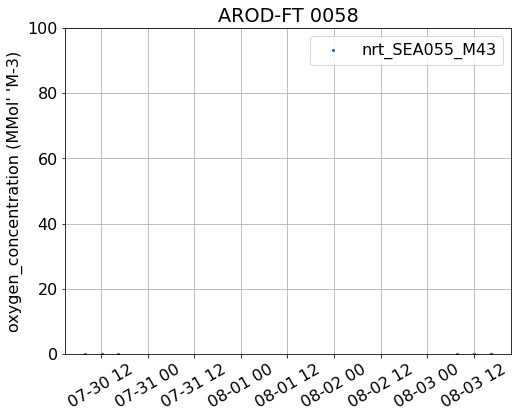

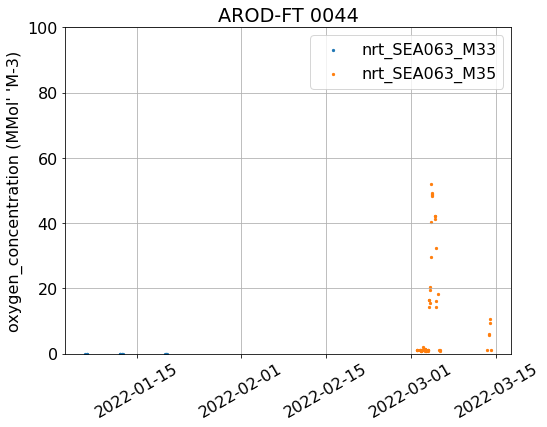

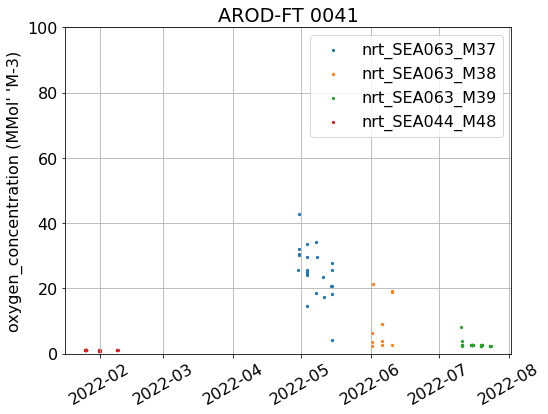

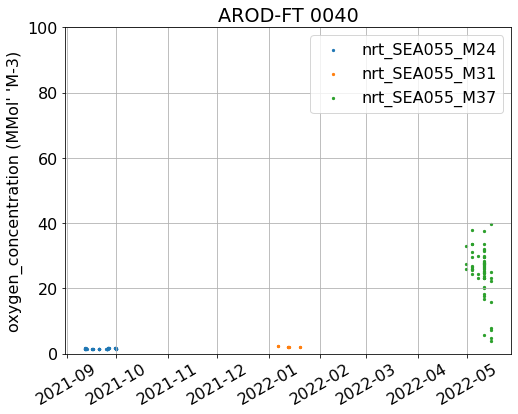

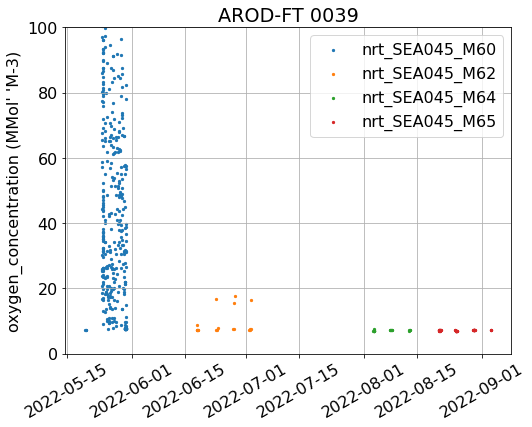

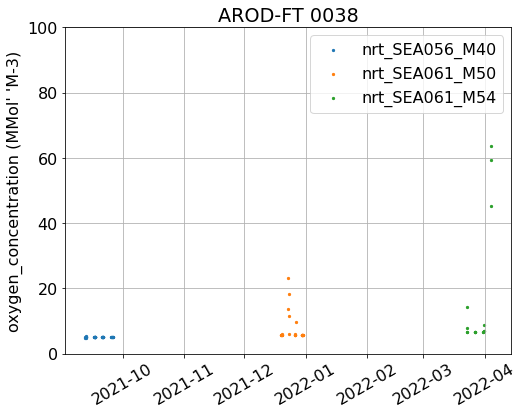

In [25]:
# Repeat the above test for all our optodes

for serial_no in serials_uniq:
    coda_datasets = {}

    for dataset_id, meta in ds_meta.items():
        oxy = meta["oxygen"]
        if oxy["serial"] == serial_no:
            e.dataset_id = dataset_id
            try:
                print(dataset_id)
                ds = e.to_xarray()
                coda_datasets[dataset_id] = ds
            except:
                print(f"no matching data in {dataset_id} for these constraints")
    if not coda_datasets:
        print(f"No datasets found for {serial_no}")
        continue
    fig, ax = plt.subplots(figsize=(8, 6))
    for dataset_id, ds in coda_datasets.items():
        oxy = ds_meta[dataset_id]["oxygen"]
        ax.scatter(ds.time, ds.oxygen_concentration, label=dataset_id, s=5)
    ax.legend()
    plt.setp(ax.get_xticklabels(), rotation=30);
    title = f'{oxy["model"]} {oxy["serial"]}'
    ax.set(ylabel=f"{ds.oxygen_concentration.name} ({ds.oxygen_concentration.units})", ylim=(0, 100), title=title)
    plt.grid()
    fig.savefig(f'figures/{oxy["model"]}_{oxy["serial"]}.png')